In [57]:
import pandas as pd
import seaborn as sb
import numpy as np


df = pd.read_csv("academic_performance.csv")
### Summation of marks for Total_Marks
# df['TOTAL_MARKS']=df.iloc[:,[6,7,8,9,10]].sum(axis=1)
# print(df['TOTAL_MARKS'])

# Starting 10 values
print(df.head(10))


   ROLL_NO REGISTRATION_NUMBER GENDER    STRATUM SCHOOL_NAT SCHOOL_TYPE  \
0      0.0    SB11201210000129      F  Stratum 4    PRIVATE    ACADEMIC   
1      1.0    SB11201210000137      F  Stratum 5    PRIVATE    ACADEMIC   
2      2.0    SB11201210005154      M  Stratum 2    PRIVATE    ACADEMIC   
3      3.0    SB11201210007504      F  Stratum 2    PRIVATE    ACADEMIC   
4      4.0    SB11201210007548      M  Stratum 4    PRIVATE    ACADEMIC   
5      5.0    SB11201210007568      F  Stratum 6    PRIVATE    ACADEMIC   
6      6.0    SB11201210007598      M  Stratum 5    PRIVATE    ACADEMIC   
7      7.0    SB11201210007615      F  Stratum 6    PRIVATE    ACADEMIC   
8      8.0    SB11201210010208      M  Stratum 2    PRIVATE   TECHNICAL   
9      9.0    SB11201210013577      M  Stratum 2    PRIVATE    ACADEMIC   

   DSBDA  CC  AI   WT  EM-3        ACADEMIC_PROGRAM  TOTAL_MARKS  
0     71  81  61   86    82  INDUSTRIAL ENGINEERING        381.0  
1     83  75  66  100    88  INDUSTRIAL 

In [58]:
# Datatypes of the dataset
print(df.dtypes)

ROLL_NO                float64
REGISTRATION_NUMBER     object
GENDER                  object
STRATUM                 object
SCHOOL_NAT              object
SCHOOL_TYPE             object
DSBDA                    int64
CC                       int64
AI                       int64
WT                       int64
EM-3                     int64
ACADEMIC_PROGRAM        object
TOTAL_MARKS            float64
dtype: object


In [59]:
# Summation of null values if any 
print(df.isnull().sum())


ROLL_NO                 0
REGISTRATION_NUMBER     0
GENDER                  0
STRATUM                 0
SCHOOL_NAT              0
SCHOOL_TYPE             0
DSBDA                   0
CC                      0
AI                      0
WT                      0
EM-3                    0
ACADEMIC_PROGRAM        0
TOTAL_MARKS            15
dtype: int64


### HANDLING NULL VALUES

In [ ]:
# Data smoothing using mean
df_test1 = df.copy()
df_test1['TOTAL_MARKS'].fillna(df_test1["TOTAL_MARKS"].mean() ,inplace=True)
    

In [60]:
# Assigning the total marks to the null values
for index, row in df.iterrows():
    if(pd.isnull(row['TOTAL_MARKS'])):
        print(df_test1["TOTAL_MARKS"][index])
        df['TOTAL_MARKS'][index] = df['DSBDA'][index]+df['CC'][index]+df['AI'][index]+df['WT'][index]+df['EM-3'][index]
        print(index, df['TOTAL_MARKS'][index])


4 398.0
13 368.0
24 360.0
34 296.0
61 301.0
77 376.0
103 308.0
128 320.0
151 356.0
173 269.0
199 358.0
221 282.0
241 355.0
258 414.0
276 268.0


/var/folders/11/pzs50dmx7w3_b1r1l7rqtgjr0000gn/T/ipykernel_31596/3343243060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTAL_MARKS'][index] = df['DSBDA'][index]+df['CC'][index]+df['AI'][index]+df['WT'][index]+df['EM-3'][index]


### CHANGING THE DATA TYPE

In [61]:
# Changing the data types from float64 to int64
print("Earlier Data-Types")
print(df.dtypes)
print("\nModified Data-Types\n")
for i in "ROLL_NO TOTAL_MARKS".split():
    df[i] = df[i].astype('int64')
    print(i,":",df[i].dtype) 


Earlier Data-Types
ROLL_NO                float64
REGISTRATION_NUMBER     object
GENDER                  object
STRATUM                 object
SCHOOL_NAT              object
SCHOOL_TYPE             object
DSBDA                    int64
CC                       int64
AI                       int64
WT                       int64
EM-3                     int64
ACADEMIC_PROGRAM        object
TOTAL_MARKS            float64
dtype: object

Modified Data-Types

ROLL_NO : int64
TOTAL_MARKS : int64


### CATEGORICAL TO QUANTITATIVE

In [62]:
df=pd.get_dummies(df,columns=['GENDER'])
df.head(10)

,ROLL_NO,REGISTRATION_NUMBER,STRATUM,SCHOOL_NAT,SCHOOL_TYPE,DSBDA,CC,AI,WT,EM-3,ACADEMIC_PROGRAM,TOTAL_MARKS,GENDER_F,GENDER_M
0,0,SB11201210000129,Stratum 4,PRIVATE,ACADEMIC,71,81,61,86,82,INDUSTRIAL ENGINEERING,381,1,0
1,1,SB11201210000137,Stratum 5,PRIVATE,ACADEMIC,83,75,66,100,88,INDUSTRIAL ENGINEERING,412,1,0
2,2,SB11201210005154,Stratum 2,PRIVATE,ACADEMIC,52,49,38,46,42,ELECTRONIC ENGINEERING,227,0,1
3,3,SB11201210007504,Stratum 2,PRIVATE,ACADEMIC,56,55,51,64,73,INDUSTRIAL ENGINEERING,299,1,0
4,4,SB11201210007548,Stratum 4,PRIVATE,ACADEMIC,80,65,76,85,92,INDUSTRIAL ENGINEERING,398,0,1
5,5,SB11201210007568,Stratum 6,PRIVATE,ACADEMIC,71,60,57,61,82,INDUSTRIAL ENGINEERING,331,1,0
6,6,SB11201210007598,Stratum 5,PRIVATE,ACADEMIC,71,75,61,75,85,INDUSTRIAL ENGINEERING,367,0,1
7,7,SB11201210007615,Stratum 6,PRIVATE,ACADEMIC,74,67,61,85,96,INDUSTRIAL ENGINEERING,383,1,0
8,8,SB11201210010208,Stratum 2,PRIVATE,TECHNICAL,10,3,16,4,30,INDUSTRIAL ENGINEERING,63,0,1
9,9,SB11201210013577,Stratum 2,PRIVATE,ACADEMIC,52,55,51,55,65,INDUSTRIAL ENGINEERING,278,0,1


### PRINTING THE IQR and OUTLIERS

Total Marks minimum:  6
Total Marks maximum:  478


<AxesSubplot:xlabel='TOTAL_MARKS'>

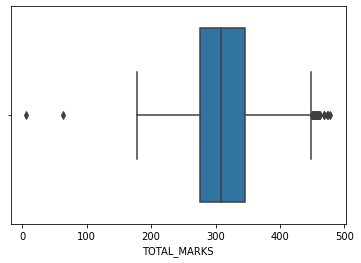

In [63]:
# Outliers
# df['TOTAL_MARKS']
print("Total Marks minimum: ", df['TOTAL_MARKS'].min())
print("Total Marks maximum: ", df['TOTAL_MARKS'].max())


sb.boxplot(x = df['TOTAL_MARKS'])


<AxesSubplot:xlabel='CC'>

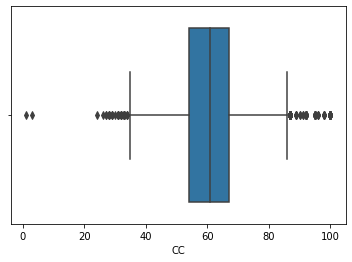

In [64]:
sb.boxplot(x = df['CC'])

<AxesSubplot:xlabel='DSBDA'>

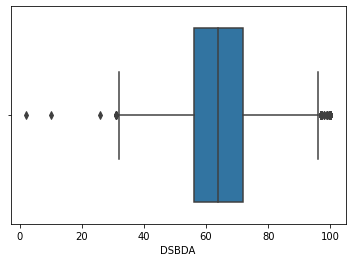

In [65]:
sb.boxplot(x = df['DSBDA'])

### DETECTING OUTLIERS

In [66]:

def detect_outliers_iqr(data):
    data_sorted = sorted(data)
    outliers = {
        "value":[],
        "index":[]
    }
    q1 = np.percentile(data_sorted,25)
    q3 = np.percentile(data_sorted,75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    ub = q3+(1.5*IQR)
    for i in range(len(data)):
        if(data[i]<lb or data[i]>ub):
            outliers["value"].append(data[i])
            outliers["index"].append(i)
    return outliers

print("TOTAL MARKS OUTLIERS")
print(detect_outliers_iqr(df['TOTAL_MARKS']))


TOTAL MARKS OUTLIERS
{'value': [63, 6, 468, 478, 461, 455, 462, 457, 453, 460, 449, 450, 459, 473, 452, 451, 457, 453, 459, 458, 450, 456, 451, 457, 469, 455, 452, 452, 460, 461, 458, 450, 475], 'index': [8, 49, 1089, 1799, 2607, 4373, 4874, 4900, 5129, 5199, 5325, 5576, 5673, 5872, 6880, 6991, 7332, 7340, 7510, 8877, 8905, 10096, 10098, 10550, 10892, 11642, 11800, 11864, 11986, 12003, 12028, 12063, 12328]}


### REMOVING THE OUTLIERS

In [67]:
print("BEFORE REMOVING OUTLIERS")
# df.describe()
df.head(10)


BEFORE REMOVING OUTLIERS


,ROLL_NO,REGISTRATION_NUMBER,STRATUM,SCHOOL_NAT,SCHOOL_TYPE,DSBDA,CC,AI,WT,EM-3,ACADEMIC_PROGRAM,TOTAL_MARKS,GENDER_F,GENDER_M
0,0,SB11201210000129,Stratum 4,PRIVATE,ACADEMIC,71,81,61,86,82,INDUSTRIAL ENGINEERING,381,1,0
1,1,SB11201210000137,Stratum 5,PRIVATE,ACADEMIC,83,75,66,100,88,INDUSTRIAL ENGINEERING,412,1,0
2,2,SB11201210005154,Stratum 2,PRIVATE,ACADEMIC,52,49,38,46,42,ELECTRONIC ENGINEERING,227,0,1
3,3,SB11201210007504,Stratum 2,PRIVATE,ACADEMIC,56,55,51,64,73,INDUSTRIAL ENGINEERING,299,1,0
4,4,SB11201210007548,Stratum 4,PRIVATE,ACADEMIC,80,65,76,85,92,INDUSTRIAL ENGINEERING,398,0,1
5,5,SB11201210007568,Stratum 6,PRIVATE,ACADEMIC,71,60,57,61,82,INDUSTRIAL ENGINEERING,331,1,0
6,6,SB11201210007598,Stratum 5,PRIVATE,ACADEMIC,71,75,61,75,85,INDUSTRIAL ENGINEERING,367,0,1
7,7,SB11201210007615,Stratum 6,PRIVATE,ACADEMIC,74,67,61,85,96,INDUSTRIAL ENGINEERING,383,1,0
8,8,SB11201210010208,Stratum 2,PRIVATE,TECHNICAL,10,3,16,4,30,INDUSTRIAL ENGINEERING,63,0,1
9,9,SB11201210013577,Stratum 2,PRIVATE,ACADEMIC,52,55,51,55,65,INDUSTRIAL ENGINEERING,278,0,1


In [68]:


def remove_outliers_iqr(data):
    data_sorted = sorted(data)
    
    q1 = np.percentile(data_sorted,25)
    q3 = np.percentile(data_sorted,75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    ub = q3+(1.5*IQR)
    for i in range(len(data)):
        if(data[i]<lb or data[i]>ub):
            df.drop(index = i,inplace=True)
            i=i-1
        else :
            continue
    

remove_outliers_iqr(df['TOTAL_MARKS'])
print("AFTER REMOVING OUTLIERS")

df.head(10)

AFTER REMOVING OUTLIERS


,ROLL_NO,REGISTRATION_NUMBER,STRATUM,SCHOOL_NAT,SCHOOL_TYPE,DSBDA,CC,AI,WT,EM-3,ACADEMIC_PROGRAM,TOTAL_MARKS,GENDER_F,GENDER_M
0,0,SB11201210000129,Stratum 4,PRIVATE,ACADEMIC,71,81,61,86,82,INDUSTRIAL ENGINEERING,381,1,0
1,1,SB11201210000137,Stratum 5,PRIVATE,ACADEMIC,83,75,66,100,88,INDUSTRIAL ENGINEERING,412,1,0
2,2,SB11201210005154,Stratum 2,PRIVATE,ACADEMIC,52,49,38,46,42,ELECTRONIC ENGINEERING,227,0,1
3,3,SB11201210007504,Stratum 2,PRIVATE,ACADEMIC,56,55,51,64,73,INDUSTRIAL ENGINEERING,299,1,0
4,4,SB11201210007548,Stratum 4,PRIVATE,ACADEMIC,80,65,76,85,92,INDUSTRIAL ENGINEERING,398,0,1
5,5,SB11201210007568,Stratum 6,PRIVATE,ACADEMIC,71,60,57,61,82,INDUSTRIAL ENGINEERING,331,1,0
6,6,SB11201210007598,Stratum 5,PRIVATE,ACADEMIC,71,75,61,75,85,INDUSTRIAL ENGINEERING,367,0,1
7,7,SB11201210007615,Stratum 6,PRIVATE,ACADEMIC,74,67,61,85,96,INDUSTRIAL ENGINEERING,383,1,0
9,9,SB11201210013577,Stratum 2,PRIVATE,ACADEMIC,52,55,51,55,65,INDUSTRIAL ENGINEERING,278,0,1
10,10,SB11201210015404,Stratum 3,PRIVATE,ACADEMIC,74,71,61,78,96,INDUSTRIAL ENGINEERING,380,1,0


### SCALING THE MARKS DOWN TO SCALE OF 0-10


In [69]:
from sklearn.preprocessing import MinMaxScaler

data_scaled = df.copy()
score_cols = df[['AI','DSBDA','CC','WT','EM-3','TOTAL_MARKS']].columns
features = data_scaled[score_cols]
scaler = MinMaxScaler(feature_range = (0, 10))
data_scaled[score_cols] = scaler.fit_transform(features.values)
data_scaled



,ROLL_NO,REGISTRATION_NUMBER,STRATUM,SCHOOL_NAT,SCHOOL_TYPE,DSBDA,CC,AI,WT,EM-3,ACADEMIC_PROGRAM,TOTAL_MARKS,GENDER_F,GENDER_M
0,0,SB11201210000129,Stratum 4,PRIVATE,ACADEMIC,6.081081,7.500000,6.1,8.426966,7.567568,INDUSTRIAL ENGINEERING,7.509294,1,0
1,1,SB11201210000137,Stratum 5,PRIVATE,ACADEMIC,7.702703,6.710526,6.6,10.000000,8.378378,INDUSTRIAL ENGINEERING,8.661710,1,0
2,2,SB11201210005154,Stratum 2,PRIVATE,ACADEMIC,3.513514,3.289474,3.8,3.932584,2.162162,ELECTRONIC ENGINEERING,1.784387,0,1
3,3,SB11201210007504,Stratum 2,PRIVATE,ACADEMIC,4.054054,4.078947,5.1,5.955056,6.351351,INDUSTRIAL ENGINEERING,4.460967,1,0
4,4,SB11201210007548,Stratum 4,PRIVATE,ACADEMIC,7.297297,5.394737,7.6,8.314607,8.918919,INDUSTRIAL ENGINEERING,8.141264,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,SB11201420568705,Stratum 2,PRIVATE,ACADEMIC,5.540541,5.921053,7.0,6.292135,7.432432,MECHATRONICS ENGINEERING,6.505576,0,1
12407,12407,SB11201420573045,Stratum 2,PUBLIC,ACADEMIC,4.324324,4.342105,6.1,5.842697,3.648649,INDUSTRIAL ENGINEERING,4.200743,0,1
12408,12408,SB11201420578809,Stratum 2,PRIVATE,ACADEMIC,5.405405,5.921053,7.5,6.629213,4.324324,INDUSTRIAL ENGINEERING,5.910781,0,1
12409,12409,SB11201420578812,Stratum 3,PRIVATE,ACADEMIC,3.648649,5.921053,6.4,5.393258,3.513514,CIVIL ENGINEERING,4.386617,1,0
